In [1]:
import sklearn
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold,train_test_split,cross_val_score,cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (24, 16)
pd.options.display.max_rows = 20

import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('data/grant19.txt', 'r', encoding='utf8') as f:
    a = f.readlines()
a[0:2]

['КАЗАХСКОЕ ОТДЕЛЕНИЕ\n', 'ОЧНАЯ ПОЛНАЯ ФОРМА ОБУЧЕНИЯ\n']

In [3]:
all_text = ''.join(a)
all_text[:300]

'КАЗАХСКОЕ ОТДЕЛЕНИЕ\nОЧНАЯ ПОЛНАЯ ФОРМА ОБУЧЕНИЯ\nB001 - Педагогика и психология\nПроходные параметры по общему конкурсу\nСумма баллов сертификата: 121\nПреимущественное право: -\nСредний балл аттестата (диплома): 3,722\nСумма баллов профильных предметов (творческих экзаменов): 70\tПроходные параметры по се'

In [4]:
all_text = all_text.replace('КАЗАХСКОЕ ОТДЕЛЕНИЕ\n', '')
all_text = all_text.replace('РУССКОЕ ОТДЕЛЕНИЕ\n', '')
all_text = all_text.replace('АНГЛИЙСКОЕ ОТДЕЛЕНИЕ\n', '')
all_text = all_text.replace('ОЧНАЯ ПОЛНАЯ ФОРМА ОБУЧЕНИЯ\n', '')
all_text = all_text.replace('ОЧНАЯ СОКРАЩЕННАЯ ФОРМА ОБУЧЕНИЯ\n', '')
all_text = all_text.replace('ОБЩИЙ КОНКУРС\n', '')
all_text = all_text.replace('СЕЛЬСКАЯ КВОТА\n', '')

In [5]:
all_text[:300]

'B001 - Педагогика и психология\nПроходные параметры по общему конкурсу\nСумма баллов сертификата: 121\nПреимущественное право: -\nСредний балл аттестата (диплома): 3,722\nСумма баллов профильных предметов (творческих экзаменов): 70\tПроходные параметры по сельской квоте\nСумма баллов сертификата: 115\nПреим'

'Проходные параметры по общему конкурсу'

In [6]:
splitter = 'Проходные параметры по общему конкурсу'

In [7]:
import re
split_index = [0]
split_index += [m.start() for m in re.finditer(splitter, all_text)]
split_index += [len(all_text)]
result = []
for i in range(1, len(split_index)-1):
    rranger = split_index[i-1:i+1]
    ranger = split_index[i:i+2]
    rfound = all_text[rranger[0]:rranger[1]].rfind('\n\n')
    nfound = all_text[ranger[0]:ranger[1]].rfind('\n\n')
    text_nn = all_text[rranger[0]+rfound:rranger[1]][2:] + all_text[ranger[0]:ranger[0] + nfound]
    result.append(text_nn)
result[0] = all_text[:split_index[1]]+result[0]

In [8]:
result[0]

'B001 - Педагогика и психология\nПроходные параметры по общему конкурсу\nСумма баллов сертификата: 121\nПреимущественное право: -\nСредний балл аттестата (диплома): 3,722\nСумма баллов профильных предметов (творческих экзаменов): 70\tПроходные параметры по сельской квоте\nСумма баллов сертификата: 115\nПреимущественное право: -\nСредний балл аттестата (диплома): 5\nСумма баллов профильных предметов (творческих экзаменов): 65\n\n№\tИКТ\tФамилия, Имя, Отчество\tСумма баллов\tВУЗ\n1\t714300554\tТүлкібаева Айсұлу Ботажанқызы \t133\t005\n2\t758300151\tШұғайқызы Арайлым \t131\t007\n3\t865300121\tСАДУЛЛАЕВА СЫРҒА ДУЙСЕНБАЙҚЫЗЫ \t130\t005\n4\t801300115\tҚуанышбекқызы Аяжан \t129\t005\n5\t147300166\tРимова Мадина Толепбергеновна \t128\t517\n6\t807300475\tМарат Інжу Маратқызы \t127\t027\n7\t807300519\tТоғайбай Дина Рахматиллақызы \t127\t007\n8\t728300205\tКадыржан Мадияр Канатулы \t127\t516\n9\t807300360\tҚалық Әсем Ергелдіқызы \t127\t027\n10\t753300020\tБисембина Гүлхан Дарханқызы \t127\t005\n1

In [9]:
result[0][:result[0].find('\n\n')]

'B001 - Педагогика и психология\nПроходные параметры по общему конкурсу\nСумма баллов сертификата: 121\nПреимущественное право: -\nСредний балл аттестата (диплома): 3,722\nСумма баллов профильных предметов (творческих экзаменов): 70\tПроходные параметры по сельской квоте\nСумма баллов сертификата: 115\nПреимущественное право: -\nСредний балл аттестата (диплома): 5\nСумма баллов профильных предметов (творческих экзаменов): 65'

In [10]:
result[0][result[0].find('\n\n')+2:].split('\n')[1].split('\t')

['1', '714300554', 'Түлкібаева Айсұлу Ботажанқызы ', '133', '005']

In [11]:
result[0][:result[0].find('\n\n')].split('\n')

['B001 - Педагогика и психология',
 'Проходные параметры по общему конкурсу',
 'Сумма баллов сертификата: 121',
 'Преимущественное право: -',
 'Средний балл аттестата (диплома): 3,722',
 'Сумма баллов профильных предметов (творческих экзаменов): 70\tПроходные параметры по сельской квоте',
 'Сумма баллов сертификата: 115',
 'Преимущественное право: -',
 'Средний балл аттестата (диплома): 5',
 'Сумма баллов профильных предметов (творческих экзаменов): 65']

In [12]:
table_result = []
for i in range(len(result)):
    for j in result[0][result[0].find('\n\n')+2:].split('\n')[1:]:
        table_result.append(result[i][:result[i].find('\n\n')].split('\n')[:6] + j.split('\t'))

In [13]:
df = pd.DataFrame(table_result)
df.columns = ['Специальность', '1', 'Сумма баллов сертификата',
              'Преимущественное право', 'Средний балл аттестата',
              'Сумма баллов профильных предметов', '2',
              'ИИН', 'ФИО', 'Балл', 'Университет']
df = df.drop(['1', '2'], axis=1)
df = df.drop_duplicates()
df

,Специальность,Сумма баллов сертификата,Преимущественное право,Средний балл аттестата,Сумма баллов профильных предметов,ИИН,ФИО,Балл,Университет
0,B001 - Педагогика и психология,Сумма баллов сертификата: 121,Преимущественное право: -,"Средний балл аттестата (диплома): 3,722",Сумма баллов профильных предметов (творческих ...,714300554,Түлкібаева Айсұлу Ботажанқызы,133,005
1,B001 - Педагогика и психология,Сумма баллов сертификата: 121,Преимущественное право: -,"Средний балл аттестата (диплома): 3,722",Сумма баллов профильных предметов (творческих ...,758300151,Шұғайқызы Арайлым,131,007
2,B001 - Педагогика и психология,Сумма баллов сертификата: 121,Преимущественное право: -,"Средний балл аттестата (диплома): 3,722",Сумма баллов профильных предметов (творческих ...,865300121,САДУЛЛАЕВА СЫРҒА ДУЙСЕНБАЙҚЫЗЫ,130,005
3,B001 - Педагогика и психология,Сумма баллов сертификата: 121,Преимущественное право: -,"Средний балл аттестата (диплома): 3,722",Сумма баллов профильных предметов (творческих ...,801300115,Қуанышбекқызы Аяжан,129,005
4,B001 - Педагогика и психология,Сумма баллов сертификата: 121,Преимущественное право: -,"Средний балл аттестата (диплома): 3,722",Сумма баллов профильных предметов (творческих ...,147300166,Римова Мадина Толепбергеновна,128,517
...,...,...,...,...,...,...,...,...,...
25610,B095 - Транспортные услуги,Сумма баллов сертификата: 36,Преимущественное право: ТиПО,"Средний балл аттестата (диплома): 4,529",Сумма баллов профильных предметов (творческих ...,828300560,Әбілқасым Нұрғазы Сәкенұлы,118,027
25611,B095 - Транспортные услуги,Сумма баллов сертификата: 36,Преимущественное право: ТиПО,"Средний балл аттестата (диплома): 4,529",Сумма баллов профильных предметов (творческих ...,869300110,Ғаниқызы Гүлсая,118,007
25612,B095 - Транспортные услуги,Сумма баллов сертификата: 36,Преимущественное право: ТиПО,"Средний балл аттестата (диплома): 4,529",Сумма баллов профильных предметов (творческих ...,781300137,Несипбаева Динара Бактыбайқызы,116,027
25613,B095 - Транспортные услуги,Сумма баллов сертификата: 36,Преимущественное право: ТиПО,"Средний балл аттестата (диплома): 4,529",Сумма баллов профильных предметов (творческих ...,781300670,Тегісбай Айзада Сатқалиқызы,116,003


In [14]:
def clean_rows_element_boolean(element):
    data = element.split(': ')[-1]
    try:
        return float(data)
    except:
        return float(0)
    
def clean_rows_element_string(element):
    data = element.split(': ')[-1]
    if data == '-':
        return 'NaN'
    else:
        return data
    
def clean_rows_element_sum(element):
    data = element.split(': ')[-1].split('\t')[0]
    try:
        return float(data)
    except:
        return float(0)
    
def clean_rows_element_grad(element):
    data = element.split(': ')[-1].split('\t')[0]
    try:
        return float(data.replace(',', '.'))
    except:
        return float(0)

In [15]:
df['Сумма баллов сертификата'] = df['Сумма баллов сертификата'].apply(clean_rows_element_boolean)
df['Преимущественное право'] = df['Преимущественное право'].apply(clean_rows_element_string)
df['Средний балл аттестата'] = df['Средний балл аттестата'].apply(clean_rows_element_grad)
df['Сумма баллов профильных предметов'] = df['Сумма баллов профильных предметов'].apply(clean_rows_element_sum)
df['Балл'] = df['Балл'].apply(int)
df = df[df['Сумма баллов сертификата'] != .0]
df

,Специальность,Сумма баллов сертификата,Преимущественное право,Средний балл аттестата,Сумма баллов профильных предметов,ИИН,ФИО,Балл,Университет
0,B001 - Педагогика и психология,121.0,NaN,3.722,70.0,714300554,Түлкібаева Айсұлу Ботажанқызы,133,005
1,B001 - Педагогика и психология,121.0,NaN,3.722,70.0,758300151,Шұғайқызы Арайлым,131,007
2,B001 - Педагогика и психология,121.0,NaN,3.722,70.0,865300121,САДУЛЛАЕВА СЫРҒА ДУЙСЕНБАЙҚЫЗЫ,130,005
3,B001 - Педагогика и психология,121.0,NaN,3.722,70.0,801300115,Қуанышбекқызы Аяжан,129,005
4,B001 - Педагогика и психология,121.0,NaN,3.722,70.0,147300166,Римова Мадина Толепбергеновна,128,517
...,...,...,...,...,...,...,...,...,...
25610,B095 - Транспортные услуги,36.0,ТиПО,4.529,31.0,828300560,Әбілқасым Нұрғазы Сәкенұлы,118,027
25611,B095 - Транспортные услуги,36.0,ТиПО,4.529,31.0,869300110,Ғаниқызы Гүлсая,118,007
25612,B095 - Транспортные услуги,36.0,ТиПО,4.529,31.0,781300137,Несипбаева Динара Бактыбайқызы,116,027
25613,B095 - Транспортные услуги,36.0,ТиПО,4.529,31.0,781300670,Тегісбай Айзада Сатқалиқызы,116,003


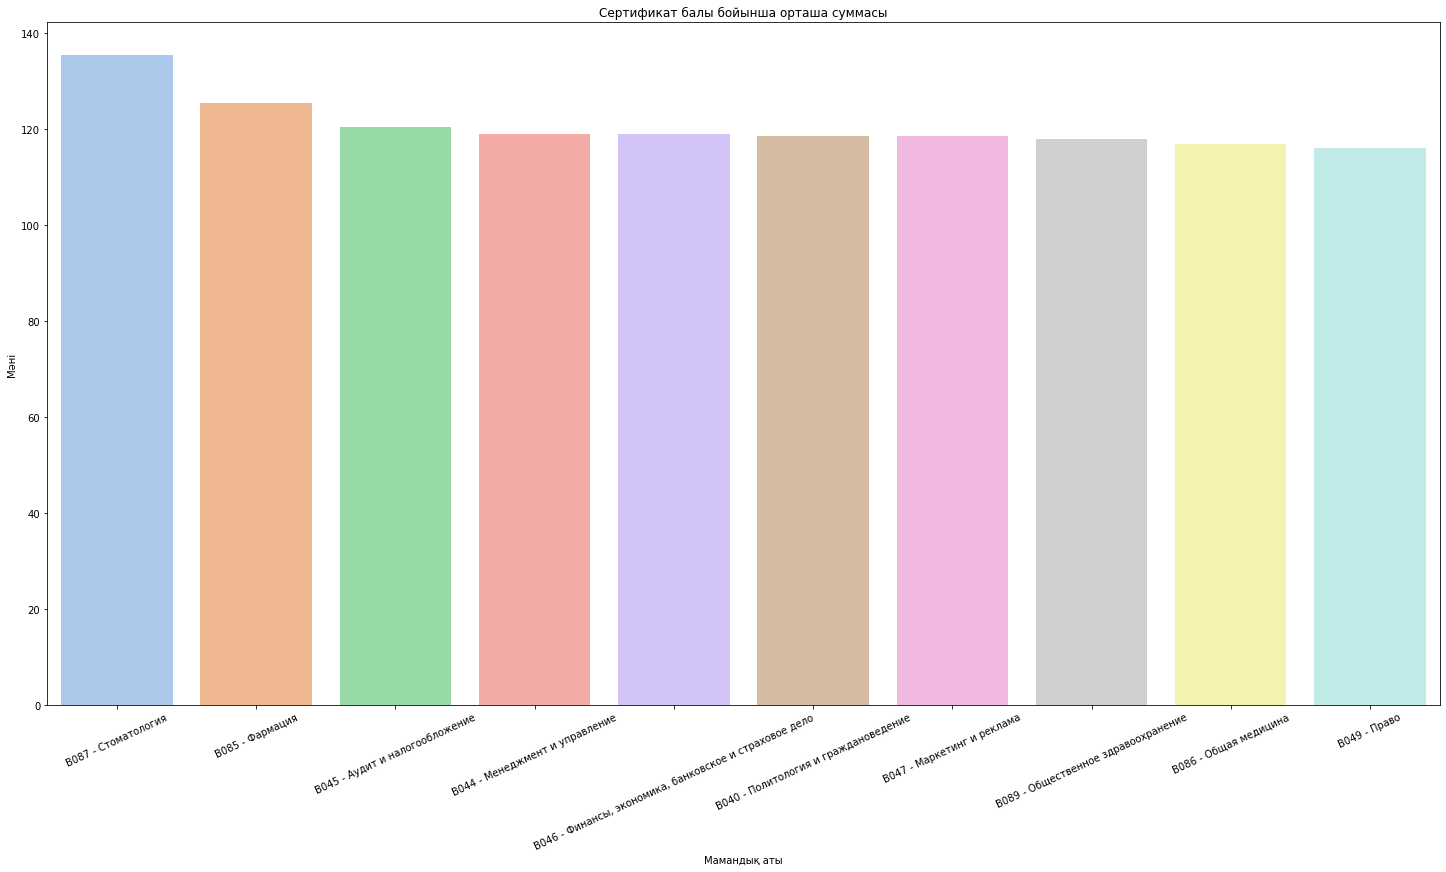

In [16]:
x= df.groupby('Специальность').mean()[['Сумма баллов сертификата']].nlargest(10, 'Сумма баллов сертификата').index
y = df.groupby('Специальность').mean()[['Сумма баллов сертификата']].nlargest(10, 'Сумма баллов сертификата')['Сумма баллов сертификата'].values

plt.figure(figsize=(20,12))
sns.barplot(x=x, y=y, palette="pastel")
plt.xticks(rotation=25)
plt.tight_layout()
plt.title("Сертификат балы бойынша орташа суммасы")
plt.xlabel("Мамандық аты")
plt.ylabel("Мәні")
plt.show()

In [17]:
from sklearn import preprocessing
specialty_encoder = preprocessing.LabelEncoder()
df['Специальность'] = specialty_encoder.fit_transform(df['Специальность'])
low_encoder = preprocessing.LabelEncoder()
df['Преимущественное право'] = low_encoder.fit_transform(df['Преимущественное право'])
university_encoder = preprocessing.LabelEncoder()
df['Университет'] = university_encoder.fit_transform(df['Университет'])

In [18]:
df

,Специальность,Сумма баллов сертификата,Преимущественное право,Средний балл аттестата,Сумма баллов профильных предметов,ИИН,ФИО,Балл,Университет
0,0,121.0,0,3.722,70.0,714300554,Түлкібаева Айсұлу Ботажанқызы,133,1
1,0,121.0,0,3.722,70.0,758300151,Шұғайқызы Арайлым,131,2
2,0,121.0,0,3.722,70.0,865300121,САДУЛЛАЕВА СЫРҒА ДУЙСЕНБАЙҚЫЗЫ,130,1
3,0,121.0,0,3.722,70.0,801300115,Қуанышбекқызы Аяжан,129,1
4,0,121.0,0,3.722,70.0,147300166,Римова Мадина Толепбергеновна,128,8
...,...,...,...,...,...,...,...,...,...
25610,89,36.0,3,4.529,31.0,828300560,Әбілқасым Нұрғазы Сәкенұлы,118,5
25611,89,36.0,3,4.529,31.0,869300110,Ғаниқызы Гүлсая,118,2
25612,89,36.0,3,4.529,31.0,781300137,Несипбаева Динара Бактыбайқызы,116,5
25613,89,36.0,3,4.529,31.0,781300670,Тегісбай Айзада Сатқалиқызы,116,0


In [19]:
df.groupby('Специальность').mean()[['Средний балл аттестата']].nlargest(10, 'Средний балл аттестата')

,Средний балл аттестата
Специальность,
80,5.000000
6,4.985500
34,4.972000
54,4.972000
33,4.972000
2,4.927000
77,4.919667
39,4.916500
40,4.856000


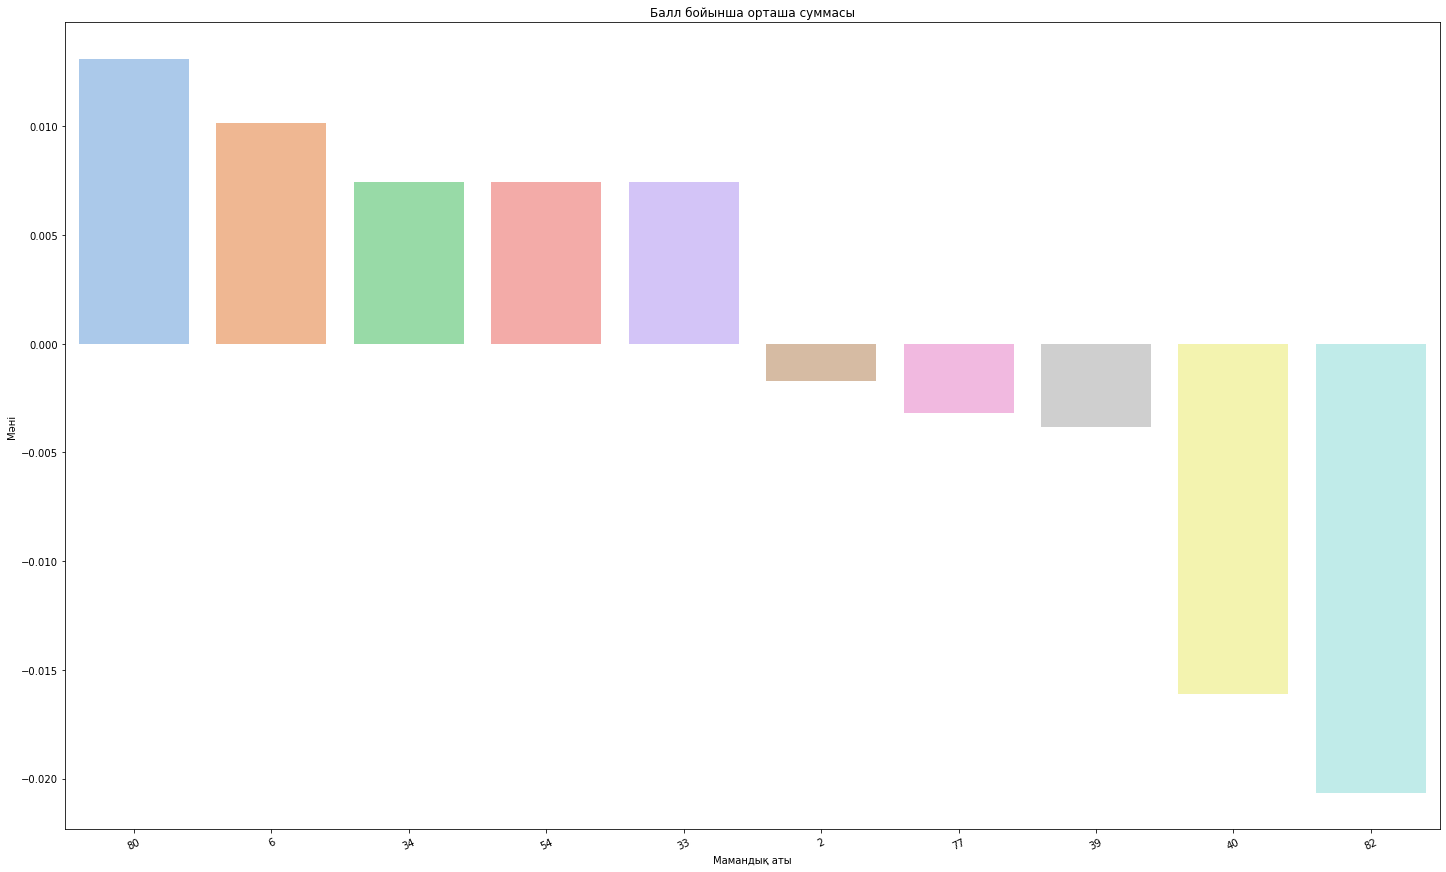

In [20]:
x = df.groupby('Специальность').mean()[['Средний балл аттестата']].nlargest(10, 'Средний балл аттестата').index.astype(str)
y = df.groupby('Специальность').mean()[['Средний балл аттестата']].nlargest(10, 'Средний балл аттестата')['Средний балл аттестата'].values
sum_y = y.mean()
y = (y-sum_y)/sum_y

plt.figure(figsize=(20,12))
sns.barplot(x=x, y=y, palette="pastel")
plt.xticks(rotation=25)
plt.tight_layout()
plt.title("Балл бойынша орташа суммасы")
plt.xlabel("Мамандық аты")
plt.ylabel("Мәні")
plt.show()

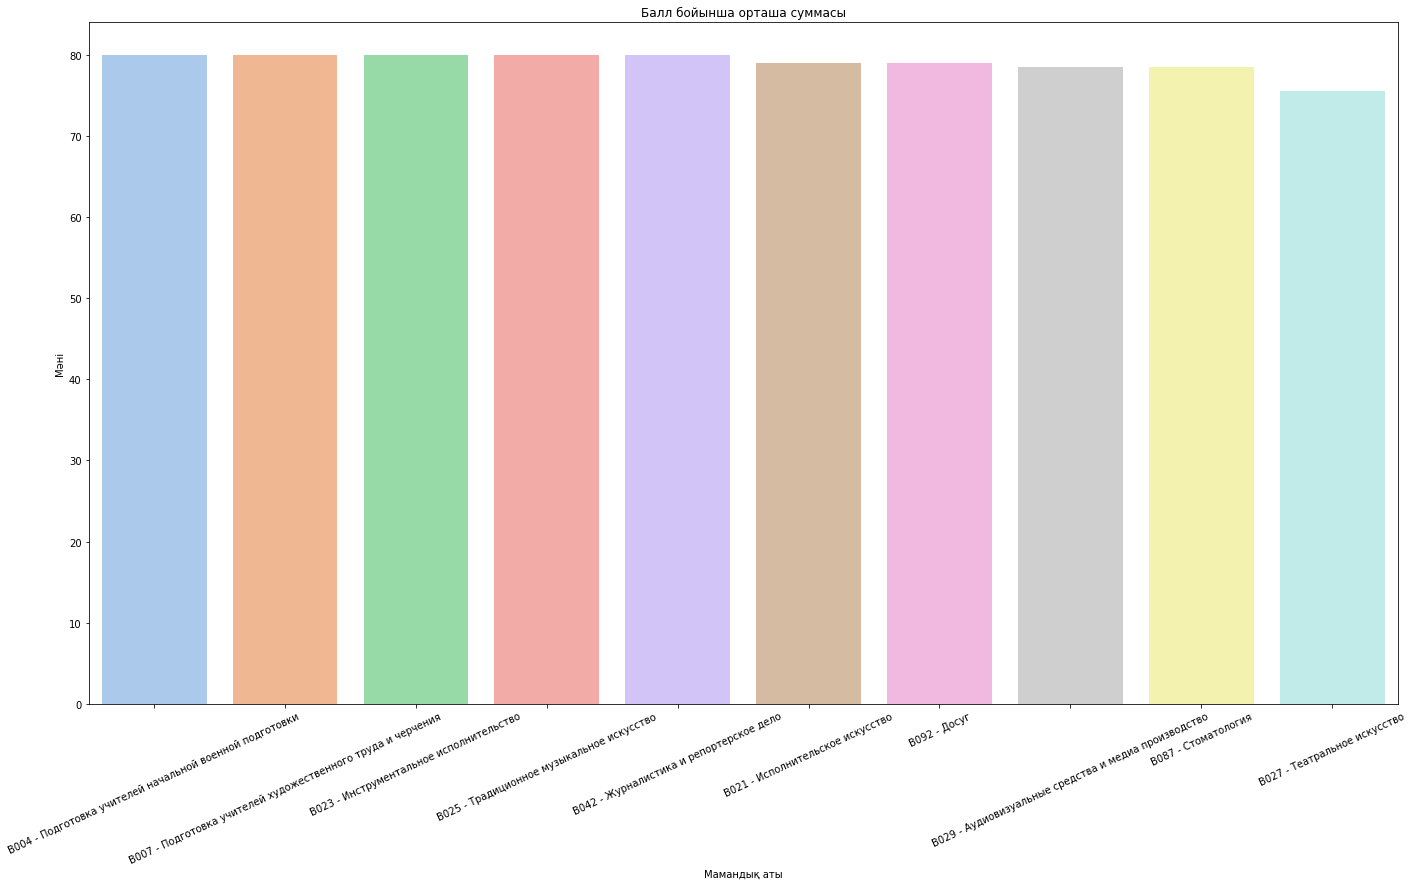

In [21]:
x = specialty_encoder.inverse_transform(df.groupby('Специальность').mean()[['Сумма баллов профильных предметов']].nlargest(10, 'Сумма баллов профильных предметов').index.values)
y = df.groupby('Специальность').mean()[['Сумма баллов профильных предметов']].nlargest(10, 'Сумма баллов профильных предметов')['Сумма баллов профильных предметов'].values

plt.figure(figsize=(20,12))
sns.barplot(x=x, y=y, palette="pastel")
plt.xticks(rotation=25)
plt.tight_layout()
plt.title("Балл бойынша орташа суммасы")
plt.xlabel("Мамандық аты")
plt.ylabel("Мәні")
plt.show()

In [22]:
df.groupby('Специальность').mean()[['Сумма баллов сертификата', 'Преимущественное право', 'Средний балл аттестата', 'Сумма баллов профильных предметов']]

,Сумма баллов сертификата,Преимущественное право,Средний балл аттестата,Сумма баллов профильных предметов
Специальность,,,,
0,70.25,0.00,4.51000,39.25
1,56.00,0.00,4.13575,31.50
2,66.25,0.25,4.92700,38.75
3,108.50,0.00,4.22250,80.00
4,79.00,0.50,4.39400,51.50
...,...,...,...,...
88,73.50,0.00,4.17150,38.00
89,70.25,1.00,4.59725,42.75
90,25.00,0.00,4.16650,19.00


In [23]:
x = df[['Университет', 'Сумма баллов сертификата', 'Преимущественное право', 'Средний балл аттестата', 'Сумма баллов профильных предметов', 'Балл',]]
y = df[['Специальность']]
x

,Университет,Сумма баллов сертификата,Преимущественное право,Средний балл аттестата,Сумма баллов профильных предметов,Балл
0,1,121.0,0,3.722,70.0,133
1,2,121.0,0,3.722,70.0,131
2,1,121.0,0,3.722,70.0,130
3,1,121.0,0,3.722,70.0,129
4,8,121.0,0,3.722,70.0,128
...,...,...,...,...,...,...
25610,5,36.0,3,4.529,31.0,118
25611,2,36.0,3,4.529,31.0,118
25612,5,36.0,3,4.529,31.0,116
25613,0,36.0,3,4.529,31.0,116


In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(len(X_train))
print(len(X_test))

9400
2350


In [25]:
import itertools

def plot_classification_report(classificationReport,
                               title='Classification report',
                               cmap='Greens'):
    df = pd.DataFrame(classificationReport).T.iloc[:,:3]
    df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])
    return df

0.9965957446808511


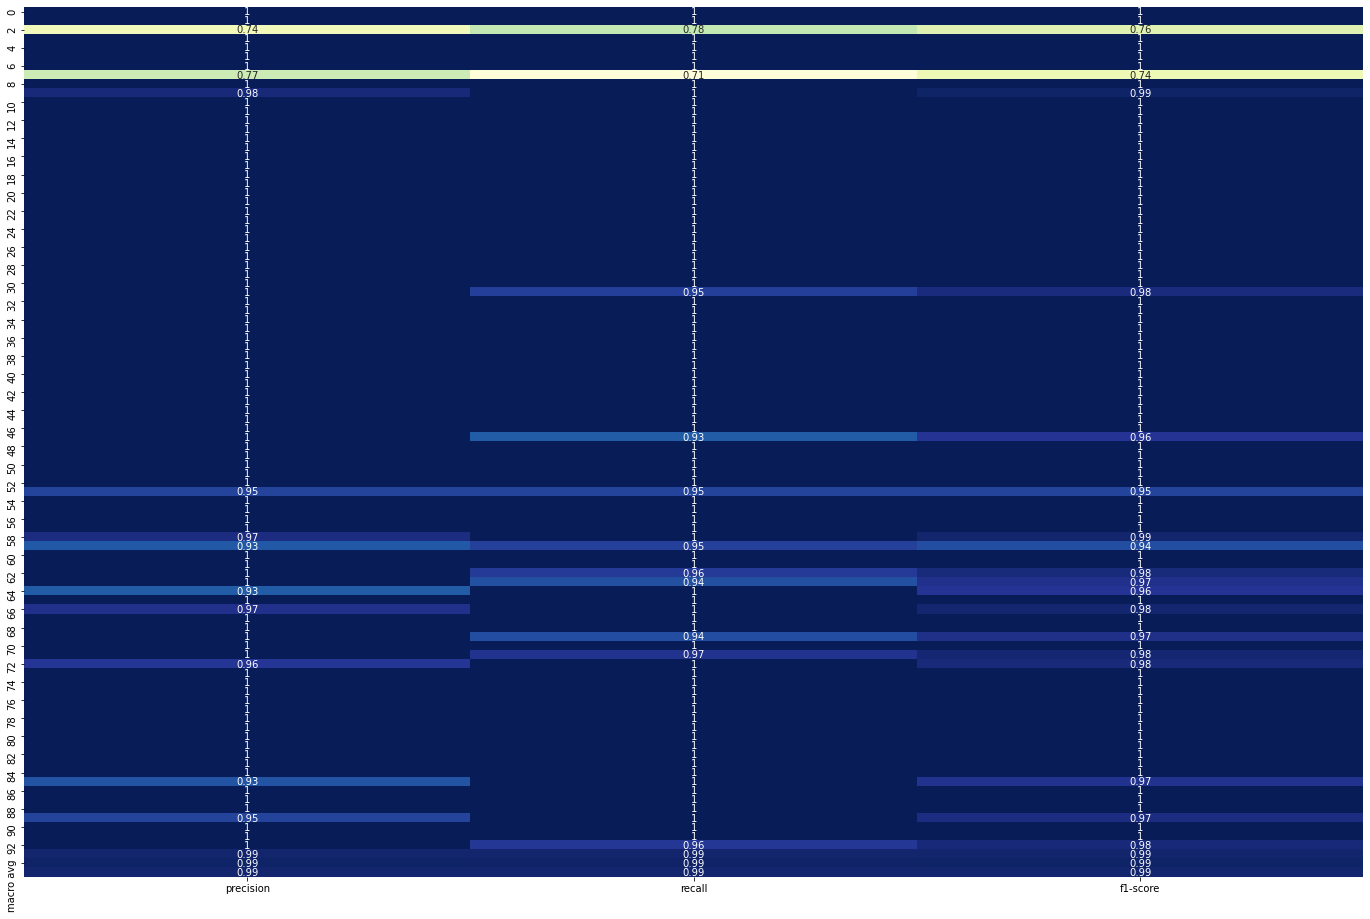

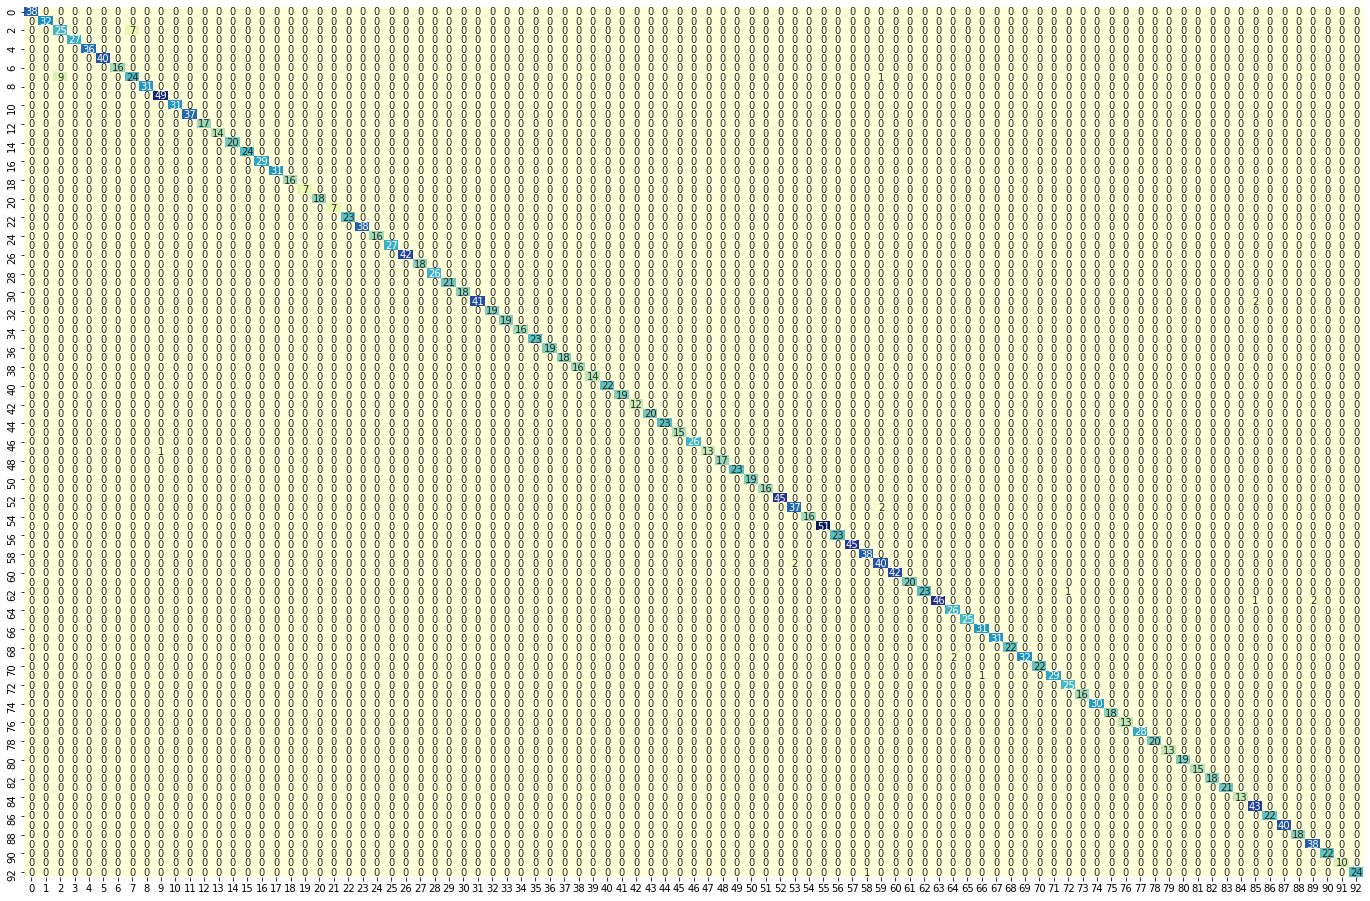

In [26]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
prediction = model.predict(X_test)

sns.heatmap(plot_classification_report(classification_report(y_test, prediction, output_dict=True)),
            square=False, annot=True, cbar=False, cmap="YlGnBu")
plt.show()
sns.heatmap(confusion_matrix(y_test, prediction), square=False, annot=True, cbar=False, cmap="YlGnBu")
plt.show()